<a href="https://colab.research.google.com/github/MoMus2000/DCGAN-for-Bird-Generation/blob/master/CreatingArt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv2DTranspose,Reshape,LeakyReLU,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ikarus777/best-artworks-of-all-time

Saving kaggle.json to kaggle.json
100% 2.29G/2.29G [00:31<00:00, 17.4MB/s]
100% 2.29G/2.29G [00:31<00:00, 78.6MB/s]


In [5]:
!unzip /content/best-artworks-of-all-time.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized/resized/Henri_Rousseau_62.jpg  
  inflating: resized/resized/Henri_Rousseau_63.jpg  
  inflating: resized/resized/Henri_Rousseau_64.jpg  
  inflating: resized/resized/Henri_Rousseau_65.jpg  
  inflating: resized/resized/Henri_Rousseau_66.jpg  
  inflating: resized/resized/Henri_Rousseau_67.jpg  
  inflating: resized/resized/Henri_Rousseau_68.jpg  
  inflating: resized/resized/Henri_Rousseau_69.jpg  
  inflating: resized/resized/Henri_Rousseau_7.jpg  
  inflating: resized/resized/Henri_Rousseau_70.jpg  
  inflating: resized/resized/Henri_Rousseau_8.jpg  
  inflating: resized/resized/Henri_Rousseau_9.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_12.jpg  
  inflating: resized/resized/Henri_de_Toulouse-Lautrec_13.jpg

In [6]:
folder = []
def load_Image(folder):
    images = []
    for j in range(len(folder)):
        for filename in os.listdir(folder[j]):
            img = cv2.imread(os.path.join(folder[j],filename))
            img = cv2.resize(img,(112,112))
            if img is not None:
                images.append(img)
    return np.asarray(images)

test = ['/content/resized/resized']
x = load_Image(test)
x = x/225.0
x = x.reshape(-1,112,112,1)*2. -1.

In [7]:
coding_size = 100
generator = Sequential()
generator.add(Dense(7*7*128, input_shape=[coding_size,]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(512,kernel_size = 5, strides =2, padding='same',activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(256,kernel_size = 5, strides =2, padding='same',activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(128,kernel_size = 5, strides =2, padding='same',activation='relu'))
generator.add(Conv2DTranspose(1,kernel_size=5, strides=2, padding ='same', activation ='tanh'))


In [8]:
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation = LeakyReLU(0.3),input_shape=[112,112,1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(64,kernel_size=5,strides=2, padding='same', activation = LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same', activation = LeakyReLU(0.3)))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.Adam())

In [9]:
GAN = Sequential([generator,discriminator])
discriminator.trainable = False
GAN.compile(loss= 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam())


In [10]:
batch_size = 32
my_data = x
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =1000)
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [11]:
epochs=50

generator, discriminator = GAN.layers


In [12]:
for epoch in range(epochs):
    print(f"Currently on epoch {epoch+1}")
    i=0
    for X_batch in dataset:
        i=i+1
        if i%100 ==0:
            print(f"\t currently on batch number {i} of {len(my_data)//batch_size}")
        noise = tf.random.normal(shape=[batch_size,coding_size])
        gen_images = generator(noise)
        x_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(x_fake_vs_real,y1)

        #Train Generator
        noise = tf.random.normal(shape=[batch_size,coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)

Currently on epoch 1
	 currently on batch number 100 of 814
	 currently on batch number 200 of 814
	 currently on batch number 300 of 814
	 currently on batch number 400 of 814
	 currently on batch number 500 of 814
	 currently on batch number 600 of 814
	 currently on batch number 700 of 814
	 currently on batch number 800 of 814
Currently on epoch 2
	 currently on batch number 100 of 814
	 currently on batch number 200 of 814
	 currently on batch number 300 of 814
	 currently on batch number 400 of 814
	 currently on batch number 500 of 814
	 currently on batch number 600 of 814
	 currently on batch number 700 of 814
	 currently on batch number 800 of 814
Currently on epoch 3
	 currently on batch number 100 of 814
	 currently on batch number 200 of 814
	 currently on batch number 300 of 814
	 currently on batch number 400 of 814
	 currently on batch number 500 of 814
	 currently on batch number 600 of 814
	 currently on batch number 700 of 814
	 currently on batch number 800 of 814
C

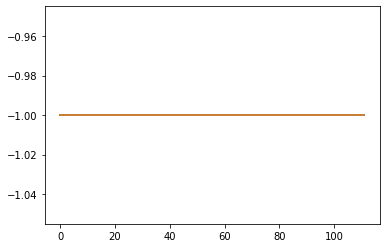

In [19]:
noise = tf.random.normal(shape=[10,coding_size])
images = generator(noise)
import matplotlib.pyplot as plt

plt.plot(images[0].numpy().reshape(112,112))
plt.show()